In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random


In [2]:
# Parameters
learning_rate = 0.001
training_epochs = 5000
display_step = 50
n_samples = 100

In [3]:
# Training data

alpha = -2.0
beta = 1.5
train_X = np.asarray(np.random.uniform(0, 5, n_samples))
train_Y = np.asarray(np.add(np.add(np.multiply(train_X, alpha), beta), np.random.normal(0, 1.5, n_samples)))

In [4]:
# Input Nodes
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Model parameters
W = tf.Variable(0.2, name="weight") #initialize to random values
b = tf.Variable(0.1, name="bias") #initialize to random values

In [5]:
# Model definition
Y_hat = tf.add(tf.multiply(X, W), b)

In [6]:

# Loss function
    # Mean squared error
cost = tf.reduce_sum(tf.pow(Y_hat-Y, 2))/(2*n_samples)

# Optimizer
    # Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

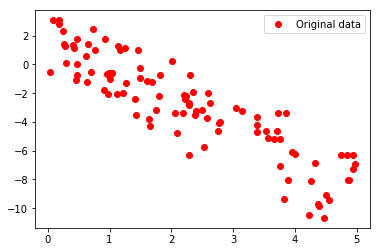

In [8]:
# Plot
plt.plot(train_X, train_Y, 'ro', label='Original data')
#plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

('Epoch:', '0050', 'cost=', '5.938244820', 'W=', -0.30599287, 'b=', -0.045618601)
('Epoch:', '0100', 'cost=', '3.420062780', 'W=', -0.64643079, 'b=', -0.13702019)
('Epoch:', '0150', 'cost=', '2.289277077', 'W=', -0.87610424, 'b=', -0.19222616)
('Epoch:', '0200', 'cost=', '1.779359460', 'W=', -1.0316645, 'b=', -0.2232911)
('Epoch:', '0250', 'cost=', '1.547341585', 'W=', -1.1376253, 'b=', -0.23827702)
('Epoch:', '0300', 'cost=', '1.439754486', 'W=', -1.2103887, 'b=', -0.2425763)
('Epoch:', '0350', 'cost=', '1.387933016', 'W=', -1.2609235, 'b=', -0.23979418)
('Epoch:', '0400', 'cost=', '1.361154079', 'W=', -1.2965616, 'b=', -0.23234253)
('Epoch:', '0450', 'cost=', '1.345660567', 'W=', -1.3222202, 'b=', -0.22183384)
('Epoch:', '0500', 'cost=', '1.335303664', 'W=', -1.3411698, 'b=', -0.20934525)
('Epoch:', '0550', 'cost=', '1.327321529', 'W=', -1.3556241, 'b=', -0.19559811)
('Epoch:', '0600', 'cost=', '1.320482492', 'W=', -1.3670429, 'b=', -0.1810727)
('Epoch:', '0650', 'cost=', '1.31423175

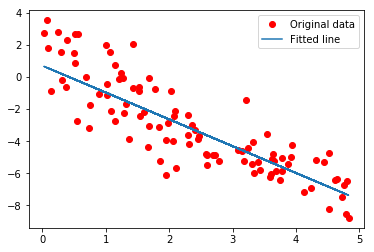

In [27]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()